### 0. Imports

In [1]:
cd ..

/Users/anna.schaar/phd/code/spatial-tools


In [2]:
from spatial_tools import read_seqfish
import spatial_tools.graph as graph
import spatial_tools.plotting as pl

import scanpy as sc

%load_ext autoreload
%autoreload 2
#%load_ext lab_black

# A. seqFISH

In [3]:
BASE_PATH = '/Users/anna.schaar/phd/datasets/seqfish/seqFISH-PLUS-master/'

### 1. Build spatial graphs

In [4]:
adata_ob = read_seqfish(BASE_PATH, "ob")
adata_svz = read_seqfish(BASE_PATH, "svz")
adata_ob

/Users/anna.schaar/opt/miniconda3/envs/spatial-tools/lib/python3.8/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 2050 × 10000
    obs: 'index', 'louvain', 'Field of View', 'Cell ID', 'X', 'Y'
    obsm: 'spatial'

In [5]:
adata_svz_5 = adata_svz[adata_svz.obs["Field of View"] == 5].copy()
# use number of neighbors
graph.spatial_connectivity(adata_svz_5, n_neigh=10, coord_type='seqfish')

In [6]:
adata_svz_5

AnnData object with n_obs × n_vars = 281 × 10000
    obs: 'index', 'louvain', 'Field of View', 'Cell ID', 'X', 'Y', 'Region'
    uns: 'spatial_neighbors'
    obsm: 'spatial'
    obsp: 'spatial_connectivities', 'spatial_distances'

### 2. Calculate centrality scores

In [7]:
graph.centrality_scores(adata_svz_5, cluster_key='louvain', connectivity_key='spatial_connectivities')

In [8]:
adata_svz_5

AnnData object with n_obs × n_vars = 281 × 10000
    obs: 'index', 'louvain', 'Field of View', 'Cell ID', 'X', 'Y', 'Region'
    uns: 'spatial_neighbors', 'louvain_centrality_scores'
    obsm: 'spatial'
    obsp: 'spatial_connectivities', 'spatial_distances'

In [9]:
df = adata_svz_5.uns['louvain_centrality_scores']

In [10]:
from pandas import DataFrame
import pandas as pd
var = DataFrame(df.columns, columns=['louvain_centrality_scores'])

In [11]:
from anndata import AnnData
import numpy as np

In [12]:
var["index"] = var['louvain_centrality_scores']
var = var.set_index("index")

cat = adata_svz_5.obs['louvain'].cat.categories.values.astype(str)
idx = {'louvain': pd.Categorical(cat, categories=cat)}

In [13]:
ad = AnnData(X=np.array(df), obs=idx, var=var)

In [20]:
ad.obs

,louvain
0,1
1,2
2,7
3,8
4,9
5,10
6,11
7,12
8,13
9,14


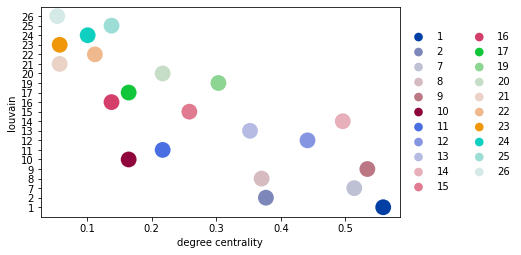

In [22]:
sc.pl.scatter(ad, x='degree centrality', y="louvain", color='louvain', size=1000, title="")

In [ ]:
cat = adata.obs[cluster_key].cat.categories.values.astype(str)
idx = {cluster_key: pd.Categorical(cat, categories=cat)}

In [17]:
pl.centrality_scores(adata_svz_5, 'louvain')

ValueError: Shape of passed values is (21, 1), indices imply (5, 1)

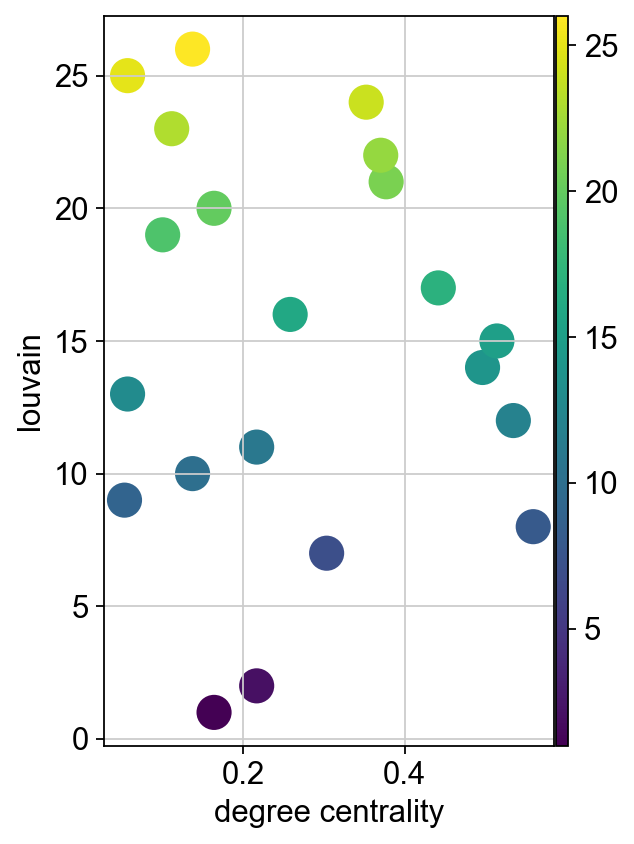

In [10]:
pl.centrality_scores(adata_svz_5, selected_score='degree centrality')

### 3. Get interactions od clusters

In [11]:
graph.interaction_matrix(adata_svz_5, clusters_key='louvain', normalized=True)

Using saved networkx graph stored under .uns in AnnData object.


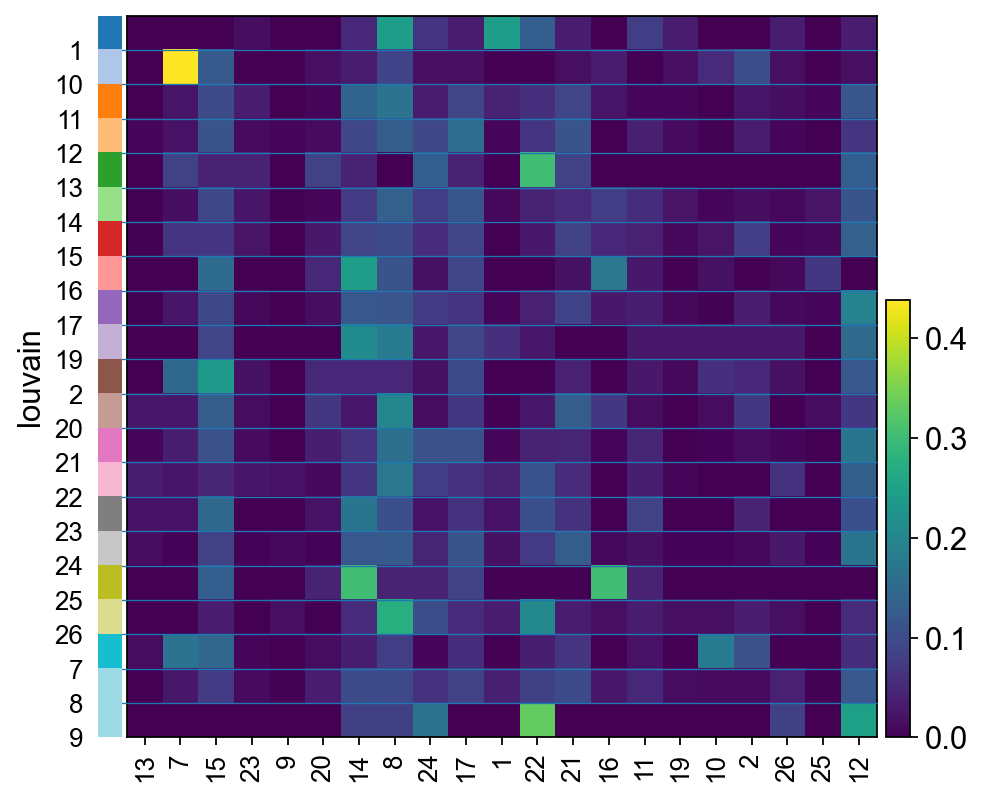

In [12]:
pl.interaction_matrix(adata_svz_5)

# B. Visium

In [ ]:
dataset_name = "V1_Mouse_Brain_Sagittal_Anterior_Section_2"
dataset_folder = ""

In [ ]:
adata = sc.read_visium(dataset_folder, count_file=f"{dataset_name}_filtered_feature_bc_matrix.h5")
adata.var_names_make_unique()
adata.var["mt"] = adata.var_names.str.startswith("MT-")
#sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

In [ ]:
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)

In [ ]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added="leiden")

In [ ]:
graph.spatial_connectivity(adata, obsm='X_spatial', n_rings=3)

In [ ]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.louvain(adata)
sc.pl.umap(adata, color='leiden')

In [ ]:
graph.centrality_scores(adata,'spatial_connectivities','leiden')

In [ ]:
graph.interaction_matrix(adata,'leiden')